Automatically created module for IPython interactive environment
(563, 2500)


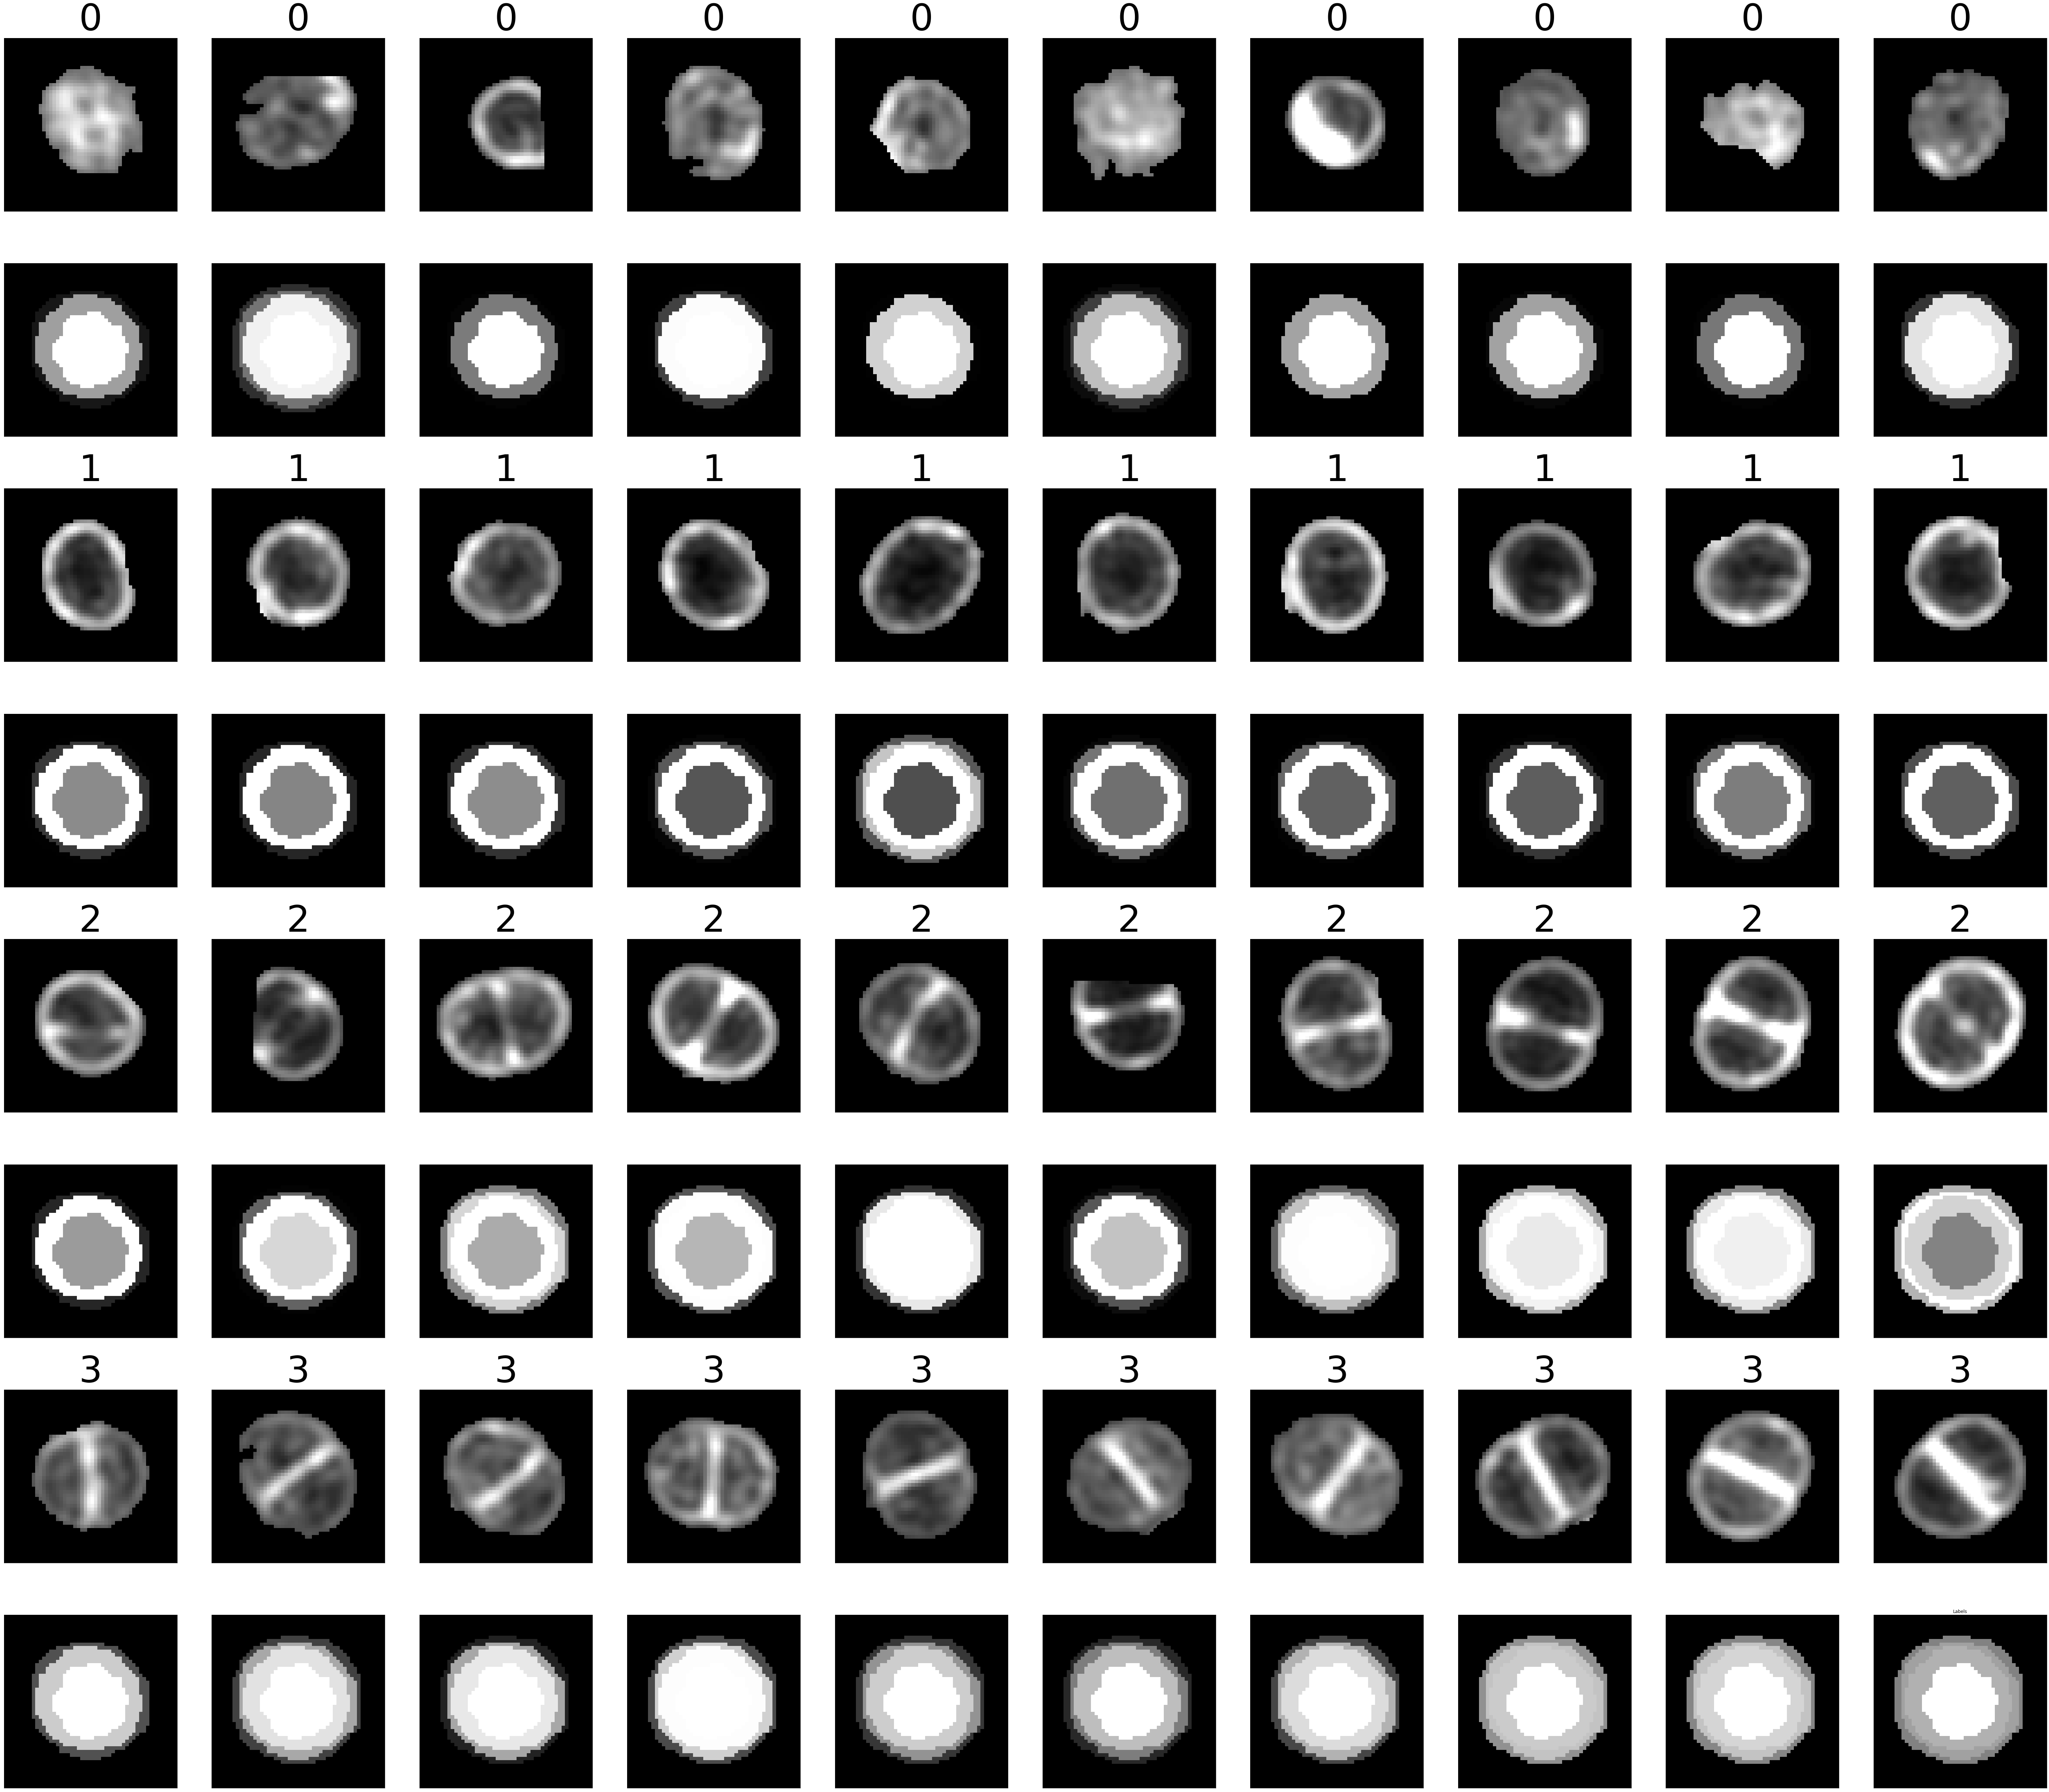

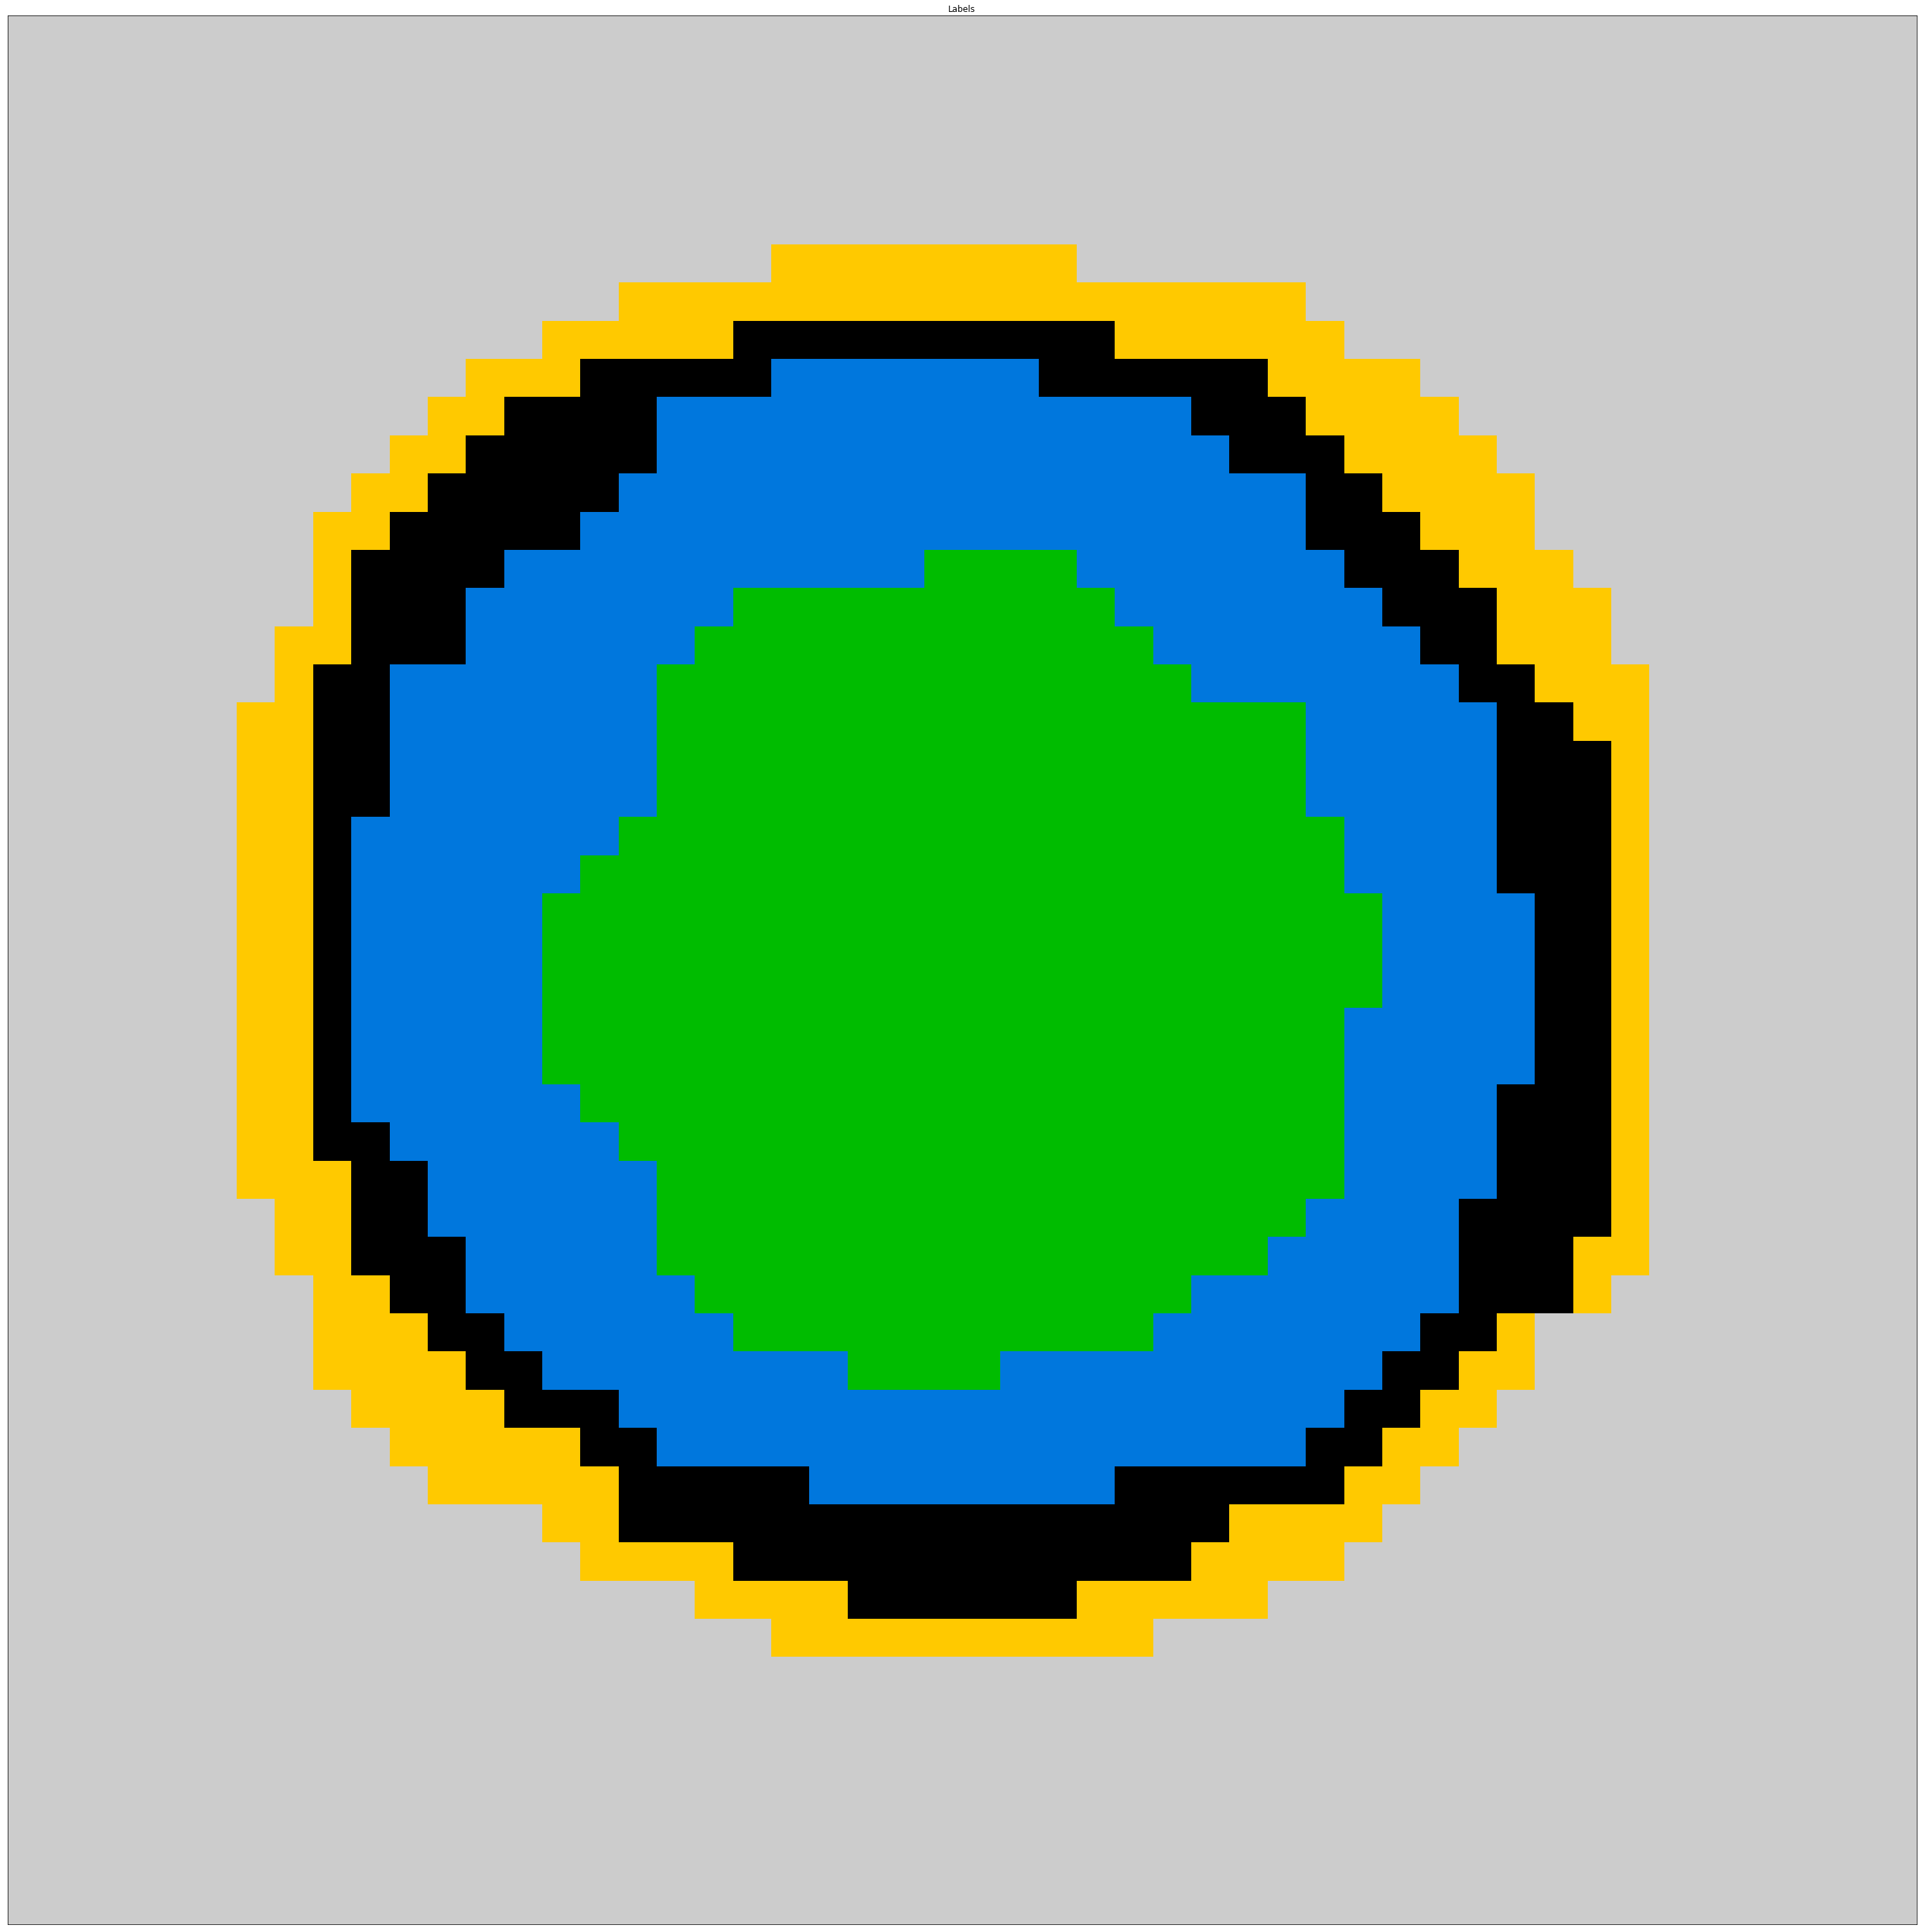

In [198]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

set_seed(4)
# create the loader class and load dataset and labels
loader = Loader().load("./tp2_data/labels.txt")

# get dataset, labels, and dataset splitted by classes
X = loader.getDataset()
ids, labels = loader.getLabels()
images = np.array(np.reshape(X, (X.shape[0], 50, 50)))

connectivity = grid_to_graph(*images[0].shape)
n_clusters = 5
agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=n_clusters)
print(X.shape)
agglo.fit(X)
X_reduced = agglo.transform(X)

X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)

plt.figure(1, (100, 100))

for j in range(4):
    for i in range(10):
        pos = j*10 + i
        img = np.array(class_split_dataset[j][i])
        img = np.reshape(img, (1,img.shape[0]))
        
        plt.subplot(9, 10, 10 * (j) + int(pos/10)*10 + (i+1))
        plt.title(j,fontsize=100)
        plt.imshow(np.reshape(img, (50, 50)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

        img_reduced = agglo.transform(img)
        img_restored = agglo.inverse_transform(img_reduced)
        
        plt.subplot(9, 10, 10 * (j+1) + int(pos/10)*10 + (i+1))
        plt.imshow(np.reshape(img_restored, (50, 50)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
plt.title('Labels')
plt.savefig(f"fc_confronted_{n_clusters}")

plt.figure(2, (50, 50))
plt.imshow(np.reshape(agglo.labels_, images[0].shape),
           interpolation='nearest', cmap=plt.cm.nipy_spectral)
plt.xticks(())
plt.yticks(())
plt.title('Labels')
plt.savefig(f"fc_cluster_{n_clusters}")

In [183]:
from __future__ import division             # forces floating point division 
import numpy as np                          # Numerical Python 
import matplotlib.pyplot as plt             # Python plotting
from PIL import Image                       # Python Imaging Library
from numpy.fft import fft2, fftshift, ifft2 # Python DFT

import cv2


In [184]:
np.array(X[0])

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

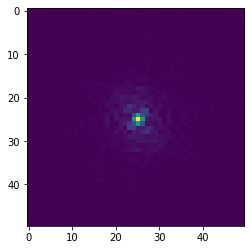

In [185]:
A = np.reshape(np.array(class_split_dataset[3][2]), (50,50))     # to PIL image
H,W = np.shape(A)
hW, hH = 300, 300

F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P)

In [194]:
img = cv2.imread('tp2_data/images/0.png')

edges = cv2.Canny(img,10,10,apertureSize = 3)
print(edges)
lines = cv2.HoughLines(edges,1,np.pi/180,200)

print(lines)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
None


TypeError: 'NoneType' object is not subscriptable

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame
from sklearn.cluster import DBSCAN

from tp2_data.tp2_aux import *
import utilities as uti

In [133]:
X_reduced.shape

(563, 16)

Classification accuracy row data: 0.857
Classification accuracy after Normalization: 0.857
Classification accuracy after Standardization: 0.857
Classification accuracy after MinMax norm: 0.857


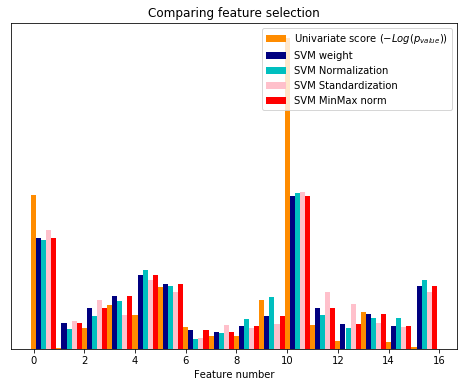

In [141]:
# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif

fig = plt.figure(i, figsize=(8, 6))
i = i+1

feat = X_reduced[labels!=0]
lbs = labels[labels!=0]

k_selection = 'all'

# Some noisy data not correlated
#E = np.random.RandomState(42).uniform(0, 0.1, size=(feat.shape[0], 20))

# Add the noisy data to the informative features
#feat = np.hstack((feat, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        feat, lbs, stratify=lbs, random_state =4
)

selector = SelectKBest(f_classif, k=k_selection)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.sum()
X_indices = np.arange(feat.shape[-1])
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')#,edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM

clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy row data: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices + .2, svm_weights, width=.2, label='SVM weight',
        color='navy')#,edgecolor='black')

# #############################################################################
# SVM on Normalized input

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=k_selection), #MinMaxScaler(), 
        Normalizer(),
    LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after Normalization: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] + .4, svm_weights_selected,
        width=.2, label='SVM Normalization', color='c')#,edgecolor='black')


# #############################################################################
# SVM on Standardize input

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=k_selection), #MinMaxScaler(), 
        StandardScaler(),
    LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after Standardization: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] + .6, svm_weights_selected,
        width=.2, label='SVM Standardization', color='pink')#,edgecolor='black')


# #############################################################################
# SVM on MinMax Normalized input

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=k_selection), 
    MinMaxScaler(),
    LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after MinMax norm: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] + .8, svm_weights_selected,
        width=.2, label='SVM MinMax norm', color='red')#,edgecolor='black')

plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')

plt.show()

In [142]:
scaler = StandardScaler()
X_reduced = scaler.fit_transform(X_reduced)

In [143]:
print(X_reduced.shape)
print(labels.shape)

(563, 16)
(563,)


[[0.         1.91075917 1.94727681 2.49324355 2.66023948]
 [0.         1.40126927 1.41554212 2.01446783 2.02005935]
 [0.         1.36159229 1.54686791 1.60058143 1.61615519]
 ...
 [0.         1.89743379 1.9038974  1.92366177 2.0611071 ]
 [0.         1.96739946 2.13645925 2.13803821 2.27565719]
 [0.         1.88379697 1.88806224 1.95468387 2.05034196]]


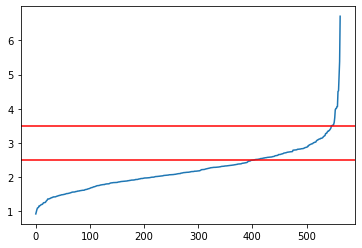

In [146]:
neigh = KNeighborsClassifier(n_neighbors=5)
nbrs = neigh.fit(X_reduced, np.ones(X_reduced.shape[0]))
distances, indices = nbrs.kneighbors(X_reduced)

print(distances)

distances = np.sort(distances, axis=0)[:,4]
plt.plot(distances)
plt.axhline(y=2.5, xmin=0, xmax=250, linestyle='-', c='red')
plt.axhline(y=3.5, xmin=0, xmax=250, linestyle='-', c='red')
plt.show()

eps_range = (2.5, 3.5)

In [147]:
fig = plt.figure(5, figsize=(6, 4))
corr = abs(DataFrame(X_reduced).corr())
corr.style.background_gradient(cmap='coolwarm').format("{:.3}")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.521,0.268,0.0215,0.0172,0.00509,0.109,0.0738,0.0113,0.0177,0.805,0.131,0.0701,0.0764,0.172,0.12
1,0.521,1.0,0.516,0.402,0.586,0.0191,0.0194,0.0677,0.138,0.0625,0.15,0.21,0.108,0.372,0.0516,0.172
2,0.268,0.516,1.0,0.552,0.629,0.117,0.143,0.245,0.27,0.00679,0.059,0.499,0.315,0.554,0.345,0.327
3,0.0215,0.402,0.552,1.0,0.659,0.215,0.321,0.374,0.38,0.0598,0.229,0.559,0.503,0.683,0.445,0.599
4,0.0172,0.586,0.629,0.659,1.0,0.279,0.415,0.389,0.37,0.121,0.268,0.69,0.595,0.646,0.615,0.523
5,0.00509,0.0191,0.117,0.215,0.279,1.0,0.703,0.726,0.718,0.722,0.0945,0.528,0.632,0.316,0.524,0.489
6,0.109,0.0194,0.143,0.321,0.415,0.703,1.0,0.609,0.492,0.653,0.0936,0.774,0.628,0.405,0.65,0.622
7,0.0738,0.0677,0.245,0.374,0.389,0.726,0.609,1.0,0.727,0.467,0.052,0.532,0.445,0.558,0.703,0.687
8,0.0113,0.138,0.27,0.38,0.37,0.718,0.492,0.727,1.0,0.45,0.0073,0.418,0.542,0.478,0.428,0.68
9,0.0177,0.0625,0.00679,0.0598,0.121,0.722,0.653,0.467,0.45,1.0,0.0745,0.357,0.365,0.182,0.382,0.328


<Figure size 432x288 with 0 Axes>

In [151]:
feat = X_restored[labels!=0]
lbs = labels[labels!=0]

X_train, X_test, y_train, y_test = train_test_split(
        feat, lbs, stratify=lbs, random_state=5
)

linSVC = LinearSVC()
linSVC.fit(X_train, y_train)
print('Classification accuracy after selection: {:.3f}'
      .format(linSVC.score(X_test, y_test)))

Classification accuracy after selection: 0.810


/Users/emanuelevivoli/miniconda3/envs/aa/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [152]:
feat = X_reduced[labels!=0]
lbs = labels[labels!=0]

X_train, X_test, y_train, y_test = train_test_split(
        feat, lbs, stratify=lbs, random_state=5
)

linSVC = LinearSVC()
linSVC.fit(X_train, y_train)
print('Classification accuracy after selection: {:.3f}'
      .format(linSVC.score(X_test, y_test)))

Classification accuracy after selection: 0.810


In [154]:
cluster = linSVC.predict(X_reduced)

In [157]:
second_file_name= f"htmls/dbscan_by_num_SVM_featureclust.html"
report_clusters(ids, cluster, second_file_name)

In [159]:
##
## FEATURES EXTRACTION
##

# selection with ANOVA F-test
f,prob = f_classif(X_reduced, labels)
indexes = np.arange(len(f))
app = [ [i, ele] for i, ele in enumerate(f)]
app.sort(key = lambda app: app[1], reverse = True)
indexes = np.array([ int(a) for a in np.array(app)[:,0]])
print(indexes)
f = f[indexes]
print(np.round(f, 3))
prob = prob[indexes]
print(np.round(prob, 3))

[ 5 10  9  8  7  0  6 15 11 14 12 13  3  4  2  1]
[52.803 40.444 30.316 24.351 21.242 18.074 13.892 10.95   8.384  8.03
  7.692  6.659  4.743  3.949  1.767  1.204]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.003 0.008 0.152 0.307]


In [164]:
n_feat = 7
featu = X_reduced[:,indexes[:n_feat]]
n_cluster_min=4
n_cluster_max=16

prefix="NEW_"

resu=uti.clustering_valutation_visualization(prefix+"K-means_",ids,labels,featu,n_cluster_min,n_cluster_max,uti.kmeans_all_results)
print()
resu=uti.clustering_valutation_visualization(prefix+"Agglomerative_",ids,labels,featu,n_cluster_min,n_cluster_max,uti.aggl_all_results)
print()
resu=uti.clustering_valutation_visualization(prefix+"Mixture_",ids,labels,featu,n_cluster_min,n_cluster_max,uti.mixture_all_results)

print()
n_cluster=12
n_feat=3
uti.bisect_kmeans_visualization(ids,featu,n_feat,n_cluster)

the best k, according to the internal index is:  4
Visualization in the file:  htmls/NEW_K-means__4cluster7feat_int.html
the best k, according to the external index is:  5
Visualization in the file:  htmls/NEW_K-means__5cluster7feat_ext.html

the best k, according to the internal index is:  4
Visualization in the file:  htmls/NEW_Agglomerative__4cluster7feat_int.html
the best k, according to the external index is:  7
Visualization in the file:  htmls/NEW_Agglomerative__7cluster7feat_ext.html

the best k, according to the internal index is:  4
Visualization in the file:  htmls/NEW_Mixture__4cluster7feat_int.html
the best k, according to the external index is:  4

Visualization in the file:  htmls/NewBiKmeans12cluster3feat.html
